In [1]:
import os
import re
import pandas as pd

In [3]:
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 500)

In [5]:
df = pd.read_parquet(os.path.join("data","cnb_ceska_proza.parquet"))

In [9]:
len(df)

47419

In [11]:
df = df.merge(pd.read_parquet(os.path.join("data","cnb_vyber.parquet")), left_index=True, right_index=True, how="left")

In [12]:
len(df)

47419

In [21]:
df = df.sort_values(by='rok')
df = df.drop_duplicates(subset=['autorstvo','titul'], keep='first')

In [23]:
len(df)

47419

In [375]:
def nakladatelstvo(radek):
    nakladatel = None
    for sloupec in ['928_a','260_b','264_b']:
        try:
            nakladatel2 = radek[sloupec][0].strip()
            if len(nakladatel2) > 2:
                nakladatel = nakladatel2
        except:
            pass
    if isinstance(nakladatel, str):
        if nakladatel[-1] == ',':
            return nakladatel[:-1]

In [371]:
df['nakladatelstvi'] = df.apply(lambda row: nakladatelstvo(row), axis=1)

In [377]:
df[df['titul'].str.contains('Rozložíš')]

,rok,titul,autorstvo,autorstvo_kod,008,020_a,020_c,020_q,041_a,041_h,041_ind1,044_a,072_a,072_x,080_a,100_4,100_7,100_a,100_d,240_l,245_a,245_c,245_n,245_p,246_a,250_a,250_b,260_a,260_b,260_c,260_e,260_f,260_ind1,264_a,264_b,264_c,264_ind2,300_a,300_b,300_c,490_a,490_v,500_a,520_a,520_b,521_a,546_a,648_a,650_a,650_x,650_y,650_z,651_a,653_a,655_a,700_4,700_7,700_a,700_d,710_4,710_7,710_a,710_b,830_a,928_a,964_a,leader,nakladatelstvi,kolikata_kniha
001,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
nkc20233563999,2023.0,Rozložíš paměť,Torčík Marek,xx0209774,231031s2023 xr g 000 f cze,[978-80-7637-399-0],None,[(brožováno)],None,None,None,None,[821.162.3-3],[Česká próza],"[821.162.3-31, (0:82-31)]",[aut],[xx0209774],"[Torčík, Marek,]",[1993-],None,[Rozložíš paměť /],[Marek Torčík],None,None,None,[Vydání první],None,None,None,None,None,None,None,[V Praze :],"[Paseka,]",[2023],[1],[266 stran ;],None,[20 cm],None,None,None,[Křehký debut je unikátním pokusem vnést do če...,[Ve 3:37 probudí hrdinu románu telefon a noční...,None,None,None,None,None,None,None,None,None,"[české romány, Czech fiction]",None,None,None,None,None,None,None,None,None,None,None,nam a22 i 4500,Paseka,1.0


In [378]:
df['nakladatelstvi'].sample(20)

001
bk193204199                    Epos
nkc20193160302    Fabrička ve dvoře
nkc20233510630               Akcent
cpk20051500112                 None
nkc20112223875                Cherm
bkneli03249           Družstvo Dílo
nkc20081834144                  M&V
nkc20081785498                 Ikar
nkc20243606272                 Ikar
nkc20223421688             BizBooks
nkc20152708841                Brána
nkc20223457207                 None
nkc20233505375             Albatros
nkc20152732753                 None
nkc20213370257      Novela bohemica
nkc20081784965     Radovan Rebstöck
nkc20102027651             Paulínky
nkc20213345081                 Ikar
nkc20092023273                 None
nkc20223456508              Maraton
Name: nakladatelstvi, dtype: object

In [379]:
df[df['rok'] >= 2023].groupby("nakladatelstvi").size().nlargest(10)

nakladatelstvi
Pointa               102
MOBA                  90
Euromedia Group       67
Nová Forma            52
Ikar                  43
Powerprint s.r.o.     43
Bambook               41
Host                  37
CPress                36
Motto                 35
dtype: int64

In [380]:
df[df['nakladatelstvi'] == 'CPress']

,rok,titul,autorstvo,autorstvo_kod,008,020_a,020_c,020_q,041_a,041_h,041_ind1,044_a,072_a,072_x,080_a,100_4,100_7,100_a,100_d,240_l,245_a,245_c,245_n,245_p,246_a,250_a,250_b,260_a,260_b,260_c,260_e,260_f,260_ind1,264_a,264_b,264_c,264_ind2,300_a,300_b,300_c,490_a,490_v,500_a,520_a,520_b,521_a,546_a,648_a,650_a,650_x,650_y,650_z,651_a,653_a,655_a,700_4,700_7,700_a,700_d,710_4,710_7,710_a,710_b,830_a,928_a,964_a,leader,nakladatelstvi,kolikata_kniha
001,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
nkc20132497944,2013.0,"Já, zlatý retrívr",Materna Dan,js20031215004,131030s2013 xr a g 000 j cze,[978-80-264-0269-5],None,[(váz.)],None,None,None,None,[821.162.3-3],[Česká próza],"[821.162.3-32, 636.7, (0:82-32), (084.12)]","[aut, pht]",[js20031215004],"[Materna, Dan,]",[1971-],None,"[Já, zlatý retrívr :]","[Dan Materna, Veronika Souralová]]",None,None,None,[1. vyd.],None,[V Brně :],"[CPress,]",[2013],None,None,None,None,None,None,None,[88 s. :],[barev. il. ;],[31 cm],None,None,None,None,None,None,None,None,"[zlatý retrívr, golden retriever]",None,None,None,None,None,"[české příběhy, fotografické publikace, Czech ...",[aut],[mzk2004261174],"[Souralová, Veronika,]",[1968-],None,None,None,None,None,[Albatros Media - CPress],None,nam a22 a 4500,CPress,1.0
nkc20152652304,2014.0,Veselí kamarádi,Dudek Adolf,jn20010309777,150113s2014 xr a a 000 1 cze,[978-80-264-0600-6],None,[(leporelo)],None,None,None,None,[821-93],[Literatura pro děti a mládež (beletrie)],"[821-93, (0.025.2)]",[ill],[jn20010309777],"[Dudek, Adolf,]",[1964-],None,[Veselí kamarádi :],[Adolf Dudek],None,None,"[Dětský metr - veselí kamarádi, Dětský metr]",None,None,[[Praha] :],"[CPress,]",[c2014],None,None,None,None,None,None,None,[[12] s. :],[vše barev. il. ;],[15 x 16 cm],None,None,None,None,None,None,None,None,None,None,None,None,None,None,"[publikace pro děti, leporela, children's lite...",None,None,None,None,None,None,None,None,None,[Albatros Media - CPress],None,nam a22 a 4500,CPress,28.0
nkc20152652305,2014.0,Zvířátka,Dudek Adolf,jn20010309777,150113s2014 xr a a 000 1 cze,[978-80-264-0601-3],None,[(leporelo)],None,None,None,None,[821-93],[Literatura pro děti a mládež (beletrie)],"[821-93, (0.025.2)]",[ill],[jn20010309777],"[Dudek, Adolf,]",[1964-],None,[Zvířátka :],[Adolf Dudek],None,None,"[Dětský mter - zvířátka, Dětský metr]",None,None,[[Praha] :],"[CPress,]",[c2014],None,None,None,None,None,None,None,[[12] s. :],[vše barev. il. ;],[15 x 16 cm],None,None,[Kartonové listy],None,None,None,None,None,None,None,None,None,None,None,"[publikace pro děti, leporela, children's lite...",None,None,None,None,None,None,None,None,None,[Albatros Media - CPress],None,nam a22 a 4500,CPress,29.0
nkc20142624601,2014.0,Kam chodí spát Usínáček,Ciprová Oldřiška,xx0002400,140915s2014 xr a a 000 f cze,[978-80-264-0497-2],None,[(váz.)],None,None,None,None,"[821.162.3-3, 821-93]","[Česká próza, Literatura pro děti a mládež (be...","[821.162.3-34, 821-93, (0:82-34)]",[aut],[xx0002400],"[Ciprová, Oldřiška,]",[1979-],None,[Kam chodí spát Usínáček :],[Oldřiška Ciprová ; ilustrace Lenka Němcová],None,None,"[Pohádky do postýlky, Kam chodí spát Usínáček ...",[1. vyd.],None,[Brno :],"[CPress,]",[2014],None,None,None,None,None,None,None,[58 s. :],[barev. il. ;],[23 cm],None,None,None,None,None,None,None,None,None,None,None,None,None,None,"[české pohádky, publikace pro děti, Czech fair...",[ill],[ola2014840634],"[Němcová, Lenka,]",[1977-],None,None,None,None,None,[Albatros Media - CPress],None,nam a22 a 4500,CPress,10.0
nkc20142627079,2014.0,O zatoulaném sluníčku,Neubauerová Zuzana,mzk2008486446,140926s2014 xr a b 000 j cze,[978-80-264-0505-4],None,[(váz.)],None,None,None,None,"[821.162.3-3, 821-93]","[Česká próza, Literatura pro děti a mládež (be...","[821.162.3-32, 821-93, (0:82-32)]",[aut],[mzk2008486446],"[Neubauerová, Zuzana,]",[1979-],None,[O zatoulaném sluníčku /],[Zuzana Neubauerová ; ilustrace Adolf Dudek],None,None,None,[1. vyd.],None,[Brno :],"[CPress,]",[2014],None,None

In [381]:
df['kolikata_kniha'] = df.groupby('autorstvo_kod').cumcount() + 1

In [382]:
df[df['autorstvo'].isin(['Kašpárek Michal'])]

,rok,titul,autorstvo,autorstvo_kod,008,020_a,020_c,020_q,041_a,041_h,041_ind1,044_a,072_a,072_x,080_a,100_4,100_7,100_a,100_d,240_l,245_a,245_c,245_n,245_p,246_a,250_a,250_b,260_a,260_b,260_c,260_e,260_f,260_ind1,264_a,264_b,264_c,264_ind2,300_a,300_b,300_c,490_a,490_v,500_a,520_a,520_b,521_a,546_a,648_a,650_a,650_x,650_y,650_z,651_a,653_a,655_a,700_4,700_7,700_a,700_d,710_4,710_7,710_a,710_b,830_a,928_a,964_a,leader,nakladatelstvi,kolikata_kniha
001,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
nkc20182997195,2018.0,Hry bez hranic,Kašpárek Michal,jx20100301005,180516s2018 xr g 000 j cze,[978-80-7549-850-2],None,[(vázáno)],None,None,None,None,[821.162.3-3],[Česká próza],"[821.162.3-32, (0:82-323.1)]",[aut],[jx20100301005],"[Kašpárek, Michal,]",[1984-],None,[Hry bez hranic /],[Michal Kašpárek],None,None,None,[Vydání první],None,None,None,None,None,None,None,[Praha :],"[Euromedia,]",[2018],[1],[156 stran ;],None,[19 cm],None,None,None,None,None,None,None,None,None,None,None,None,None,None,"[české novely, satirické novely, Czech novella...",None,None,None,None,None,None,None,None,None,[Euromedia Group - Listen],None,nam a22 i 4500,Euromedia,1.0
nkc20233549616,2023.0,Fosilie,Kašpárek Michal,jx20100301005,230925s2023 xr g 000 f cze,[978-80-7637-400-3],None,[(brožováno)],None,None,None,None,[821.162.3-3],[Česká próza],"[821.162.3-31, (0:82-31)]",[aut],[jx20100301005],"[Kašpárek, Michal,]",[1984-],None,[Fosilie /],[Michal Kašpárek],None,None,None,[Vydání první],None,None,None,None,None,None,None,[V Praze :],"[Paseka,]",[2023],[1],[183 stran ;],None,[20 cm],None,None,None,"[Tři generace, tři životní názory a postoje. D...","[Děda, bývalý učitel tělocviku, vnímá, že svět...",None,None,None,None,None,None,None,None,None,"[české romány, Czech fiction]",None,None,None,None,None,None,None,None,None,None,None,nam a22 i 4500,Paseka,2.0


In [383]:
import plotly.graph_objects as go
from io import StringIO

In [384]:
zajima_nas = ['Nová Forma','Euromedia Group','Albatros','MOBA','Fragment','Motto','Host','Argo','Ikar','Vyšehrad','Paseka','Listen']

In [385]:
vyber.groupby('nakladatelstvi').size().nlargest(60)

nakladatelstvi
Nová Forma         157
Albatros            73
Fragment            71
Euromedia Group     61
Motto               54
MOBA                50
Host                48
Argo                46
Ikar                34
Paseka              14
Vyšehrad            14
Listen               1
dtype: int64

In [386]:
vyber = df[(df['rok'] >= 2014) & (df['kolikata_kniha'].isin([1,2]))]
vyber = vyber[vyber['autorstvo_kod'].isin(vyber[vyber['kolikata_kniha'] == 2]['autorstvo_kod'].to_list())]
vyber = vyber[vyber['nakladatelstvi'].isin(zajima_nas)]
len(vyber)

623

In [387]:
prvni = pd.Series(vyber.groupby("autorstvo_kod")['nakladatelstvi'].first(), name='prvni')

In [388]:
druhe = pd.Series(vyber.groupby("autorstvo_kod")['nakladatelstvi'].last(), name='druhe')

In [389]:
presuny = pd.DataFrame([prvni, druhe]).transpose()

In [390]:
presuny

,prvni,druhe
autorstvo_kod,,
av2014811888,Motto,Motto
av2016919484,Argo,Argo
av2018988377,Euromedia Group,Euromedia Group
av2018998220,Euromedia Group,Euromedia Group
av20191019769,Ikar,Ikar
av20201089270,Fragment,Fragment
hka2015873890,Argo,Argo
hka2016933781,Albatros,Albatros
hka2018993600,Euromedia Group,Euromedia Group


In [391]:
grouped = vyber.sort_values('kolikata_kniha').groupby('autorstvo')

In [458]:
source = []
target = []
value = []

In [462]:
for author, group in grouped:
    if len(group) >= 2:
        first_book = group.iloc[0]
        second_book = group.iloc[1]
        
        source.append(first_book['nakladatelstvi'])
        target.append(second_book['nakladatelstvi'])
        value.append(1)

In [464]:
first_publishers = list(set(source))
second_publishers = list(set(target))

In [466]:
node_labels = first_publishers + second_publishers

# Map publishers to indices
source_indices = [first_publishers.index(s) for s in source]
target_indices = [len(first_publishers) + second_publishers.index(t) for t in target]

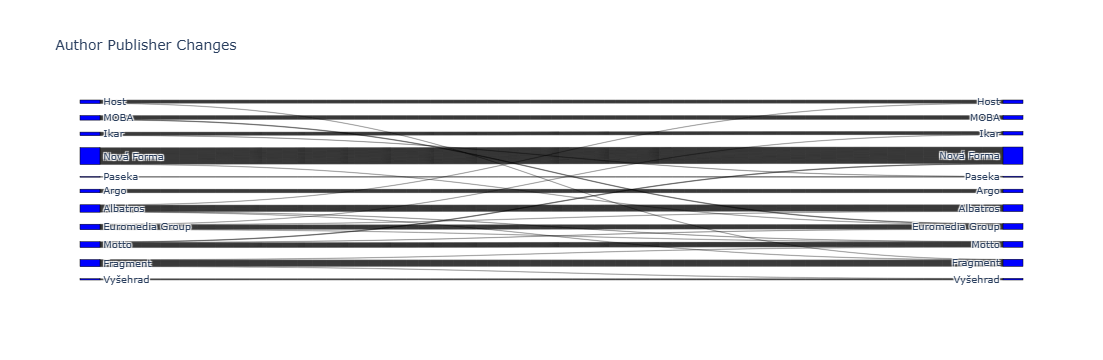

In [468]:
fig = go.Figure(data=[go.Sankey(
    node = dict(
      pad = 15,
      thickness = 20,
      line = dict(color = "black", width = 0.5),
      label = node_labels,
      color = "blue"
    ),
    link = dict(
      source = source_indices,
      target = target_indices,
      value = value
  ))])

fig.update_layout(title_text="Author Publisher Changes", font_size=10, height=800)
fig.show()

In [397]:
vyber[vyber['autorstvo'].str.contains('Kašp')]

,rok,titul,autorstvo,autorstvo_kod,008,020_a,020_c,020_q,041_a,041_h,041_ind1,044_a,072_a,072_x,080_a,100_4,100_7,100_a,100_d,240_l,245_a,245_c,245_n,245_p,246_a,250_a,250_b,260_a,260_b,260_c,260_e,260_f,260_ind1,264_a,264_b,264_c,264_ind2,300_a,300_b,300_c,490_a,490_v,500_a,520_a,520_b,521_a,546_a,648_a,650_a,650_x,650_y,650_z,651_a,653_a,655_a,700_4,700_7,700_a,700_d,710_4,710_7,710_a,710_b,830_a,928_a,964_a,leader,nakladatelstvi,kolikata_kniha
001,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
nkc20233549616,2023.0,Fosilie,Kašpárek Michal,jx20100301005,230925s2023 xr g 000 f cze,[978-80-7637-400-3],None,[(brožováno)],None,None,None,None,[821.162.3-3],[Česká próza],"[821.162.3-31, (0:82-31)]",[aut],[jx20100301005],"[Kašpárek, Michal,]",[1984-],None,[Fosilie /],[Michal Kašpárek],None,None,None,[Vydání první],None,None,None,None,None,None,None,[V Praze :],"[Paseka,]",[2023],[1],[183 stran ;],None,[20 cm],None,None,None,"[Tři generace, tři životní názory a postoje. D...","[Děda, bývalý učitel tělocviku, vnímá, že svět...",None,None,None,None,None,None,None,None,None,"[české romány, Czech fiction]",None,None,None,None,None,None,None,None,None,None,None,nam a22 i 4500,Paseka,2.0


In [398]:
df[df['titul'].str.contains('Rozložíš')]

,rok,titul,autorstvo,autorstvo_kod,008,020_a,020_c,020_q,041_a,041_h,041_ind1,044_a,072_a,072_x,080_a,100_4,100_7,100_a,100_d,240_l,245_a,245_c,245_n,245_p,246_a,250_a,250_b,260_a,260_b,260_c,260_e,260_f,260_ind1,264_a,264_b,264_c,264_ind2,300_a,300_b,300_c,490_a,490_v,500_a,520_a,520_b,521_a,546_a,648_a,650_a,650_x,650_y,650_z,651_a,653_a,655_a,700_4,700_7,700_a,700_d,710_4,710_7,710_a,710_b,830_a,928_a,964_a,leader,nakladatelstvi,kolikata_kniha
001,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
nkc20233563999,2023.0,Rozložíš paměť,Torčík Marek,xx0209774,231031s2023 xr g 000 f cze,[978-80-7637-399-0],None,[(brožováno)],None,None,None,None,[821.162.3-3],[Česká próza],"[821.162.3-31, (0:82-31)]",[aut],[xx0209774],"[Torčík, Marek,]",[1993-],None,[Rozložíš paměť /],[Marek Torčík],None,None,None,[Vydání první],None,None,None,None,None,None,None,[V Praze :],"[Paseka,]",[2023],[1],[266 stran ;],None,[20 cm],None,None,None,[Křehký debut je unikátním pokusem vnést do če...,[Ve 3:37 probudí hrdinu románu telefon a noční...,None,None,None,None,None,None,None,None,None,"[české romány, Czech fiction]",None,None,None,None,None,None,None,None,None,None,None,nam a22 i 4500,Paseka,1.0


In [399]:
vyber[vyber['nakladatelstvi'].str.contains('Paseka')]

,rok,titul,autorstvo,autorstvo_kod,008,020_a,020_c,020_q,041_a,041_h,041_ind1,044_a,072_a,072_x,080_a,100_4,100_7,100_a,100_d,240_l,245_a,245_c,245_n,245_p,246_a,250_a,250_b,260_a,260_b,260_c,260_e,260_f,260_ind1,264_a,264_b,264_c,264_ind2,300_a,300_b,300_c,490_a,490_v,500_a,520_a,520_b,521_a,546_a,648_a,650_a,650_x,650_y,650_z,651_a,653_a,655_a,700_4,700_7,700_a,700_d,710_4,710_7,710_a,710_b,830_a,928_a,964_a,leader,nakladatelstvi,kolikata_kniha
001,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
nkc20152694206,2015.0,Nuselskej punk,Green Scum,pna2015866736,150420s2015 xr a g 000 j cze,[978-80-7432-586-1],None,[(brož.)],None,None,None,None,[821.162.3-3],[Česká próza],"[821.162.3-32, (0:82-32)]",[aut],[pna2015866736],[Green Scum],[1962-],None,[Nuselskej punk /],[Green Scum ; [ilustrace Lucie Bux]],None,None,None,[Vyd. 1.],None,"[V Praze ;, a Litomyšli :]","[Paseka,]",[2015],None,None,None,None,None,None,None,[205 s. :],[il. ;],[20 cm],None,None,None,None,None,None,None,None,None,None,None,None,None,None,"[české povídky, Czech short stories]",None,None,None,None,None,None,None,None,None,None,None,nam a22 a 4500,Paseka,1.0
nkc20162790278,2016.0,Nové povídání o pejskovi a kočičce,Peška Vlastimil,ola200209185,160404s2016 xr a b 000 j cze,[978-80-7432-718-6],None,[(vázáno)],None,None,None,None,"[821.162.3-3, 821-93]","[Česká próza, Literatura pro děti a mládež (be...","[821.162.3-32, 821-93, (0:82-32)]",[aut],[ola200209185],"[Peška, Vlastimil,]",[1954-],None,[Nové povídání o pejskovi a kočičce /],[napsal Vlastimil Peška ; nakreslil Jaroslav M...,None,None,None,[Vydání první],None,None,None,None,None,None,None,[V Praze :],"[Paseka,]",[2016],[1],[109 stran :],[ilustrace (některé barevné) ;],[20 cm],None,None,"[""Na motivy původního díla Povídání o pejskovi...",None,None,None,None,None,None,None,None,None,None,None,"[české příběhy, publikace pro děti, Czech stor...","[ill, None]","[xx0008951, aun2007415078]","[Milfajt, Jaroslav,, Čapek, Josef,]","[1958-, 1887-1945.]",None,None,None,None,None,None,None,nam a22 i 4500,Paseka,2.0
nkc20172941833,2017.0,Sběrná kniha,Třeštíková Helena,jn20000402438,171017s2017 xr ac e 001 1acze,[978-80-7432-752-0],None,[(vázáno)],None,None,None,None,"[791, 929]","[Film. Cirkus. Lidová zábava, Biografie]","[791.633-055.2, 929, 791.229.2-022.358, 791.22...",[aut],[jn20000402438],"[Třeštíková, Helena,]",[1949-],None,[Sběrná kniha /],[Helena Třeštíková v rozhovoru s Pavlem Kosatí...,None,None,None,[Vydání první],None,None,None,None,None,None,None,[V Praze :],"[Paseka,]",[2017],[1],[335 stran :],"[ilustrace, portréty ;]",[21 cm],None,None,None,None,None,None,None,[20.-21. století],"[filmové režisérky, časosběrný dokumentární fi...",None,"[20.-21. století, 20.-21. století, 20.-21. sto...","[Česko, Česko, Česko, Czechia, Czechia, Czechia]",None,None,"[rozhovory, autobiografické vzpomínky, fotogra...",[aut],[jn19990201035],"[Kosatík, Pavel,]",[1962-],None,None,None,None,None,None,None,nam a22 i 4500,Paseka,2.0
nkc20183056008,2018.0,Hodinky od Ašera,Dostálová Zuzana,xx0208478,181115s2018 xr g 000 f cze,[978-80-7432-922-7],"[Kč 299,00]",[(vázáno) :],None,None,None,None,[821.162.3-3],[Česká próza],"[821.162.3-31, (0:82-31)]",[aut],[xx0208478],"[Dostálová, Zuzana,]",[1976-],None,[Hodinky od Ašera /],[Zuzana Dostálová],None,None,None,[Vydání první],None,None,None,None,None,None,None,[V Praze :],"[Paseka,]",[2018],[1],[335 stran ;],None,[21 cm],None,None,None,None,None,None,None,None,None,None,None,None,None,None,"[české romány, Czech fiction]",None,None,None,None,None,None,None,None,None,None,None,nam a22 i 4500,Paseka,2.0
nkc20193082032,2019.0,Prašina.,Matocha Vojtěch,kv2018987893,191011s2019 xr a c 000 f cze,[978-80-7432-989-0],"[Kč 289,00]",[(vázáno) :],None,None,None,None,"[821.162.3-3, 821-93]","[Česká próza, Literatura pro děti a mládež (be...","[821.162.3-31, 821-93, (0:82-311.3)]",[aut],[kv2018987893],"[Matocha, Vojtěch,]",[1989-],None,[Prašina.],[Vojtěch Matocha ; ilustroval Karel Osoha],No

## Debutantská a přebírací nakladatelství

In [401]:
df12 = df[df['rok'] >= 2014]
df12 = df12[df12['kolikata_kniha'].isin([1,2])]
df12 = df12[df12['autorstvo_kod'].isin(df12[df12['kolikata_kniha'] == 1]['autorstvo_kod'].drop_duplicates().to_list())]
df12 = df12[df12['autorstvo_kod'].isin(df12[df12['kolikata_kniha'] == 2]['autorstvo_kod'].drop_duplicates().to_list())]
df12 = df12[df12['nakladatelstvi'].isin(df12.groupby('nakladatelstvi').size().nlargest(200).index.to_list())]
len(df12)

1978

In [402]:
(df12[df12['kolikata_kniha'] == 1].groupby('nakladatelstvi').size() / df12[df12['kolikata_kniha'] == 2].groupby('nakladatelstvi').size()).nlargest(20)

nakladatelstvi
Beletris                     6.500000
ArtPorte                     3.000000
Baobab                       3.000000
Fantom Print                 3.000000
Revolver Revue               3.000000
Alfa-Omega                   2.666667
Tigris, spol. s r.o.         2.500000
Šimon Ryšavý                 2.250000
ASKI                         2.000000
Andrea Sasínová - Šuplík     2.000000
Balt-East                    2.000000
BizBooks                     2.000000
Credit-plus s.r.o.           2.000000
Dokořán                      2.000000
KANT                         2.000000
Katolický týdeník            2.000000
Laguna                       2.000000
Lika klub                    2.000000
Miloslav Krist - ArtKrist    2.000000
Nakladatelství TN            2.000000
dtype: float64

In [403]:
(df12[df12['kolikata_kniha'] == 1].groupby('nakladatelstvi').size() / df12[df12['kolikata_kniha'] == 2].groupby('nakladatelstvi').size()).nsmallest(20)

nakladatelstvi
Dobrovský s.r.o.       0.333333
Paseka                 0.333333
Protimluv              0.333333
Práh                   0.333333
Rosier                 0.333333
TN                     0.333333
H.R.G. spol. s r.o.    0.363636
Běžíliška              0.400000
Mystery Press          0.400000
Nová Forma, s.r.o.     0.428571
Argo                   0.500000
Burian a Tichák        0.500000
Bylo nebylo            0.500000
Cattacan               0.500000
Gorgona                0.500000
Grada Publishing       0.500000
Knihkupectví CZ        0.500000
Lirego                 0.500000
Malvern                0.500000
Meander                0.500000
dtype: float64

In [404]:
df12[df12['autorstvo'].str.contains('Kašp')]

,rok,titul,autorstvo,autorstvo_kod,008,020_a,020_c,020_q,041_a,041_h,041_ind1,044_a,072_a,072_x,080_a,100_4,100_7,100_a,100_d,240_l,245_a,245_c,245_n,245_p,246_a,250_a,250_b,260_a,260_b,260_c,260_e,260_f,260_ind1,264_a,264_b,264_c,264_ind2,300_a,300_b,300_c,490_a,490_v,500_a,520_a,520_b,521_a,546_a,648_a,650_a,650_x,650_y,650_z,651_a,653_a,655_a,700_4,700_7,700_a,700_d,710_4,710_7,710_a,710_b,830_a,928_a,964_a,leader,nakladatelstvi,kolikata_kniha
001,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
nkc20182997195,2018.0,Hry bez hranic,Kašpárek Michal,jx20100301005,180516s2018 xr g 000 j cze,[978-80-7549-850-2],None,[(vázáno)],None,None,None,None,[821.162.3-3],[Česká próza],"[821.162.3-32, (0:82-323.1)]",[aut],[jx20100301005],"[Kašpárek, Michal,]",[1984-],None,[Hry bez hranic /],[Michal Kašpárek],None,None,None,[Vydání první],None,None,None,None,None,None,None,[Praha :],"[Euromedia,]",[2018],[1],[156 stran ;],None,[19 cm],None,None,None,None,None,None,None,None,None,None,None,None,None,None,"[české novely, satirické novely, Czech novella...",None,None,None,None,None,None,None,None,None,[Euromedia Group - Listen],None,nam a22 i 4500,Euromedia,1.0
nkc20233549616,2023.0,Fosilie,Kašpárek Michal,jx20100301005,230925s2023 xr g 000 f cze,[978-80-7637-400-3],None,[(brožováno)],None,None,None,None,[821.162.3-3],[Česká próza],"[821.162.3-31, (0:82-31)]",[aut],[jx20100301005],"[Kašpárek, Michal,]",[1984-],None,[Fosilie /],[Michal Kašpárek],None,None,None,[Vydání první],None,None,None,None,None,None,None,[V Praze :],"[Paseka,]",[2023],[1],[183 stran ;],None,[20 cm],None,None,None,"[Tři generace, tři životní názory a postoje. D...","[Děda, bývalý učitel tělocviku, vnímá, že svět...",None,None,None,None,None,None,None,None,None,"[české romány, Czech fiction]",None,None,None,None,None,None,None,None,None,None,None,nam a22 i 4500,Paseka,2.0


## Celková ne/věrnost

In [406]:
pocty_nakladatelstvi = df12.groupby('autorstvo_kod')['nakladatelstvi'].nunique()

In [407]:
len(pocty_nakladatelstvi[pocty_nakladatelstvi == 1]) / len(pocty_nakladatelstvi)

0.7262672811059908

In [408]:
len(pocty_nakladatelstvi[pocty_nakladatelstvi == 2]) / len(pocty_nakladatelstvi)

0.27373271889400924

In [409]:
len(pocty_nakladatelstvi[pocty_nakladatelstvi > 2]) / len(pocty_nakladatelstvi)

0.0

## Etc

In [411]:
df.groupby("autorstvo")['kolikata_kniha'].max().nlargest(20)

autorstvo
Javořická Vlasta          169.0
Pospíšilová Zuzana        161.0
Němcová Božena            154.0
Pittnerová Vlasta         141.0
Řeháčková Věra            138.0
Cílek Roman               111.0
Březinová Ivona            97.0
Švandrlík Miloslav         96.0
Francková Zuzana           95.0
Dostál Alois               90.0
Čapek Karel                88.0
Šťastný Alfons Bohumil     83.0
Bauer Jan                  82.0
Cimický Jan                81.0
Uher František             81.0
Nedbalová Marie            78.0
Beran Ladislav             77.0
Vondruška Vlastimil        77.0
Jirásek Alois              73.0
Neruda Jan                 73.0
Name: kolikata_kniha, dtype: float64

In [412]:
df[df['rok'].isin([2022,2023,2024])].groupby("autorstvo")['kolikata_kniha'].max().nlargest(20)

autorstvo
Pospíšilová Zuzana      161.0
Němcová Božena          154.0
Pittnerová Vlasta       141.0
Cílek Roman             111.0
Březinová Ivona          97.0
Švandrlík Miloslav       96.0
Čapek Karel              88.0
Bauer Jan                82.0
Cimický Jan              81.0
Uher František           81.0
Beran Ladislav           77.0
Vondruška Vlastimil      77.0
Rožnovská Lenka          70.0
Jirotka Antonín          66.0
Hašek Jaroslav           62.0
Whitton Hana             58.0
Hrabal Bohumil           57.0
Krolupperová Daniela     54.0
Herrmann Ignát           52.0
Drijverová Martina       51.0
Name: kolikata_kniha, dtype: float64